In [1]:
import scanpy as sc
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
#from gprofiler import GProfiler
#import loompy as lp
import rpy2.rinterface_lib.callbacks
import logging
import scrublet as scr
#from rpy2.robjects import pandas2ri
#import anndata2ri
import warnings
warnings.filterwarnings('ignore')
import os              
os.environ['PYTHONHASHSEED'] = '0'
sc.settings.set_figure_params(dpi=100, facecolor='white')
import scipy

In [2]:
adata= sc.read("/home/lugli/spuccio/Projects/SP025_NaClTcell/Analysis/CD8CD4_integrated.h5ad")

In [4]:
adata.X = adata.layers['counts']

In [5]:
sc.pp.normalize_total(adata, target_sum=1e4,exclude_highly_expressed=True)
sc.pp.log1p(adata)

In [7]:
import celltypist
from celltypist import models

In [10]:
sc.pp.neighbors(adata, n_neighbors=10, use_rep='X_pca_harmony')

In [11]:
predictions = celltypist.annotate(adata, model = 'Immune_All_Low.pkl', majority_voting = True)

🔬 Input data has 36824 cells and 33487 genes
🔗 Matching reference genes in the model
🧬 5529 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 15
🗳️ Majority voting the predictions
✅ Majority voting done!


In [12]:
adata = predictions.to_adata()

In [13]:
adata

AnnData object with n_obs × n_vars = 36824 × 33487
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'batch', 'predicted_labels', 'majority_voting', 'conf_score', 'n_counts', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.7', 'desc_0.8', 'over_clustering'
    var: 'gene_id'
    uns: 'CellFromTumor_colors', 'CellType_colors', 'leiden', 'log1p', 'majority_voting_colors', 'pca', 'prob_matrix0.4', 'prob_matrix0.5', 'prob_matrix0.6', 'prob_matrix0.7', 'prob_matrix0.8', 'umap', 'neighbors'
    obsm: 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.7', 'X_Embeded_z0.8', 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.7', 'X_umap0.8'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

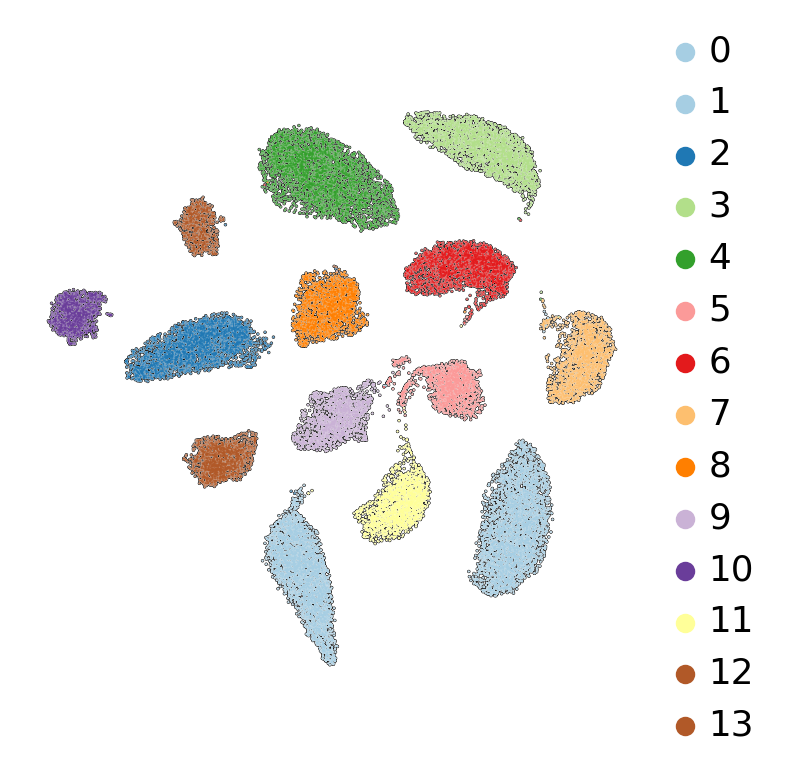

In [15]:
sc.pl.umap(adata, color='desc_0.8', add_outline=True,
           legend_fontoutline=1,frameon=False,
               title='  ', palette='Paired',s=2)

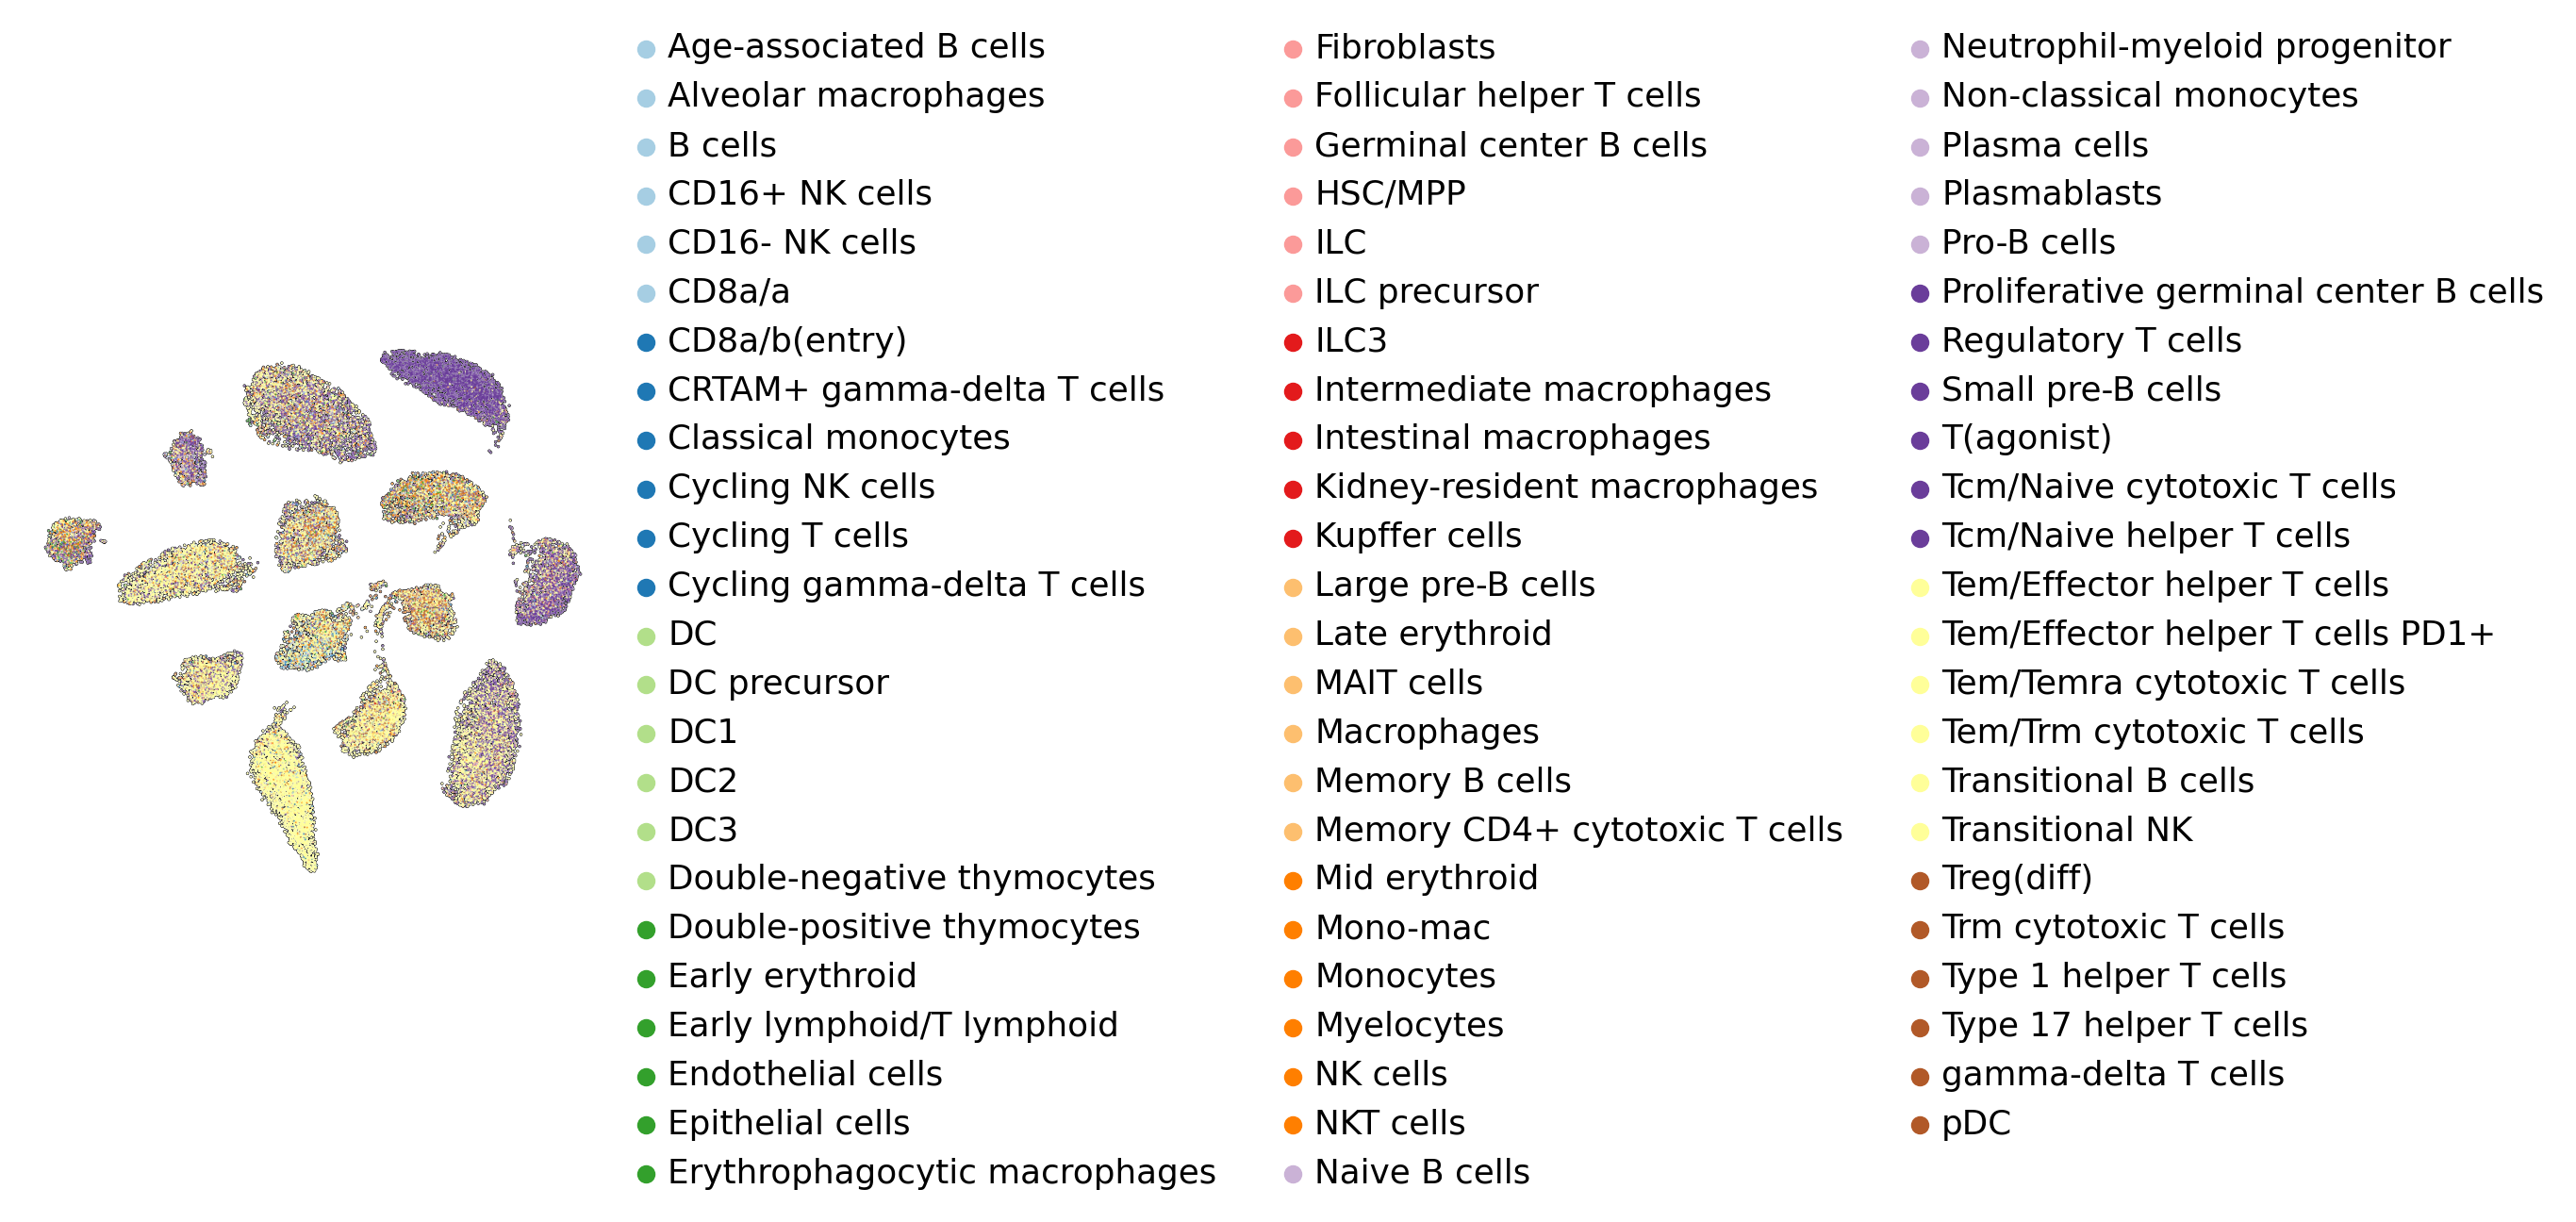

In [25]:
sc.pl.umap(adata, color='predicted_labels', add_outline=True,
           legend_fontoutline=1,frameon=False,
               title='  ', palette='Paired',s=2)

In [35]:
pd.DataFrame(adata.obs['predicted_labels'].value_counts()).head(50)

,predicted_labels
Tem/Trm cytotoxic T cells,10629
Regulatory T cells,7731
Tem/Effector helper T cells,5518
Tcm/Naive helper T cells,2014
Tem/Temra cytotoxic T cells,1662
NK cells,1045
Trm cytotoxic T cells,1033
Naive B cells,928
Type 1 helper T cells,702
CRTAM+ gamma-delta T cells,488


In [36]:
adata[adata.obs['predicted_labels'].isin(['CD8a/a',
                                          'Tem/Trm cytotoxic T cells',
                                          'Tem/Temra cytotoxic T cells',
                                          'Trm cytotoxic T cells','Tcm/Naive cytotoxic T cells',
                                          'T(agonist)','CD8a/b(entry)'
                                         ])]

View of AnnData object with n_obs × n_vars = 14147 × 33487
    obs: 'CellId', 'CellFromTumor', 'PatientNumber', 'TumorType', 'TumorSite', 'CellType', 'batch', 'predicted_labels', 'majority_voting', 'conf_score', 'n_counts', 'desc_0.4', 'desc_0.5', 'desc_0.6', 'desc_0.7', 'desc_0.8', 'over_clustering'
    var: 'gene_id'
    uns: 'CellFromTumor_colors', 'CellType_colors', 'leiden', 'log1p', 'majority_voting_colors', 'pca', 'prob_matrix0.4', 'prob_matrix0.5', 'prob_matrix0.6', 'prob_matrix0.7', 'prob_matrix0.8', 'umap', 'neighbors', 'desc_0.8_colors', 'predicted_labels_colors'
    obsm: 'X_Embeded_z0.4', 'X_Embeded_z0.5', 'X_Embeded_z0.6', 'X_Embeded_z0.7', 'X_Embeded_z0.8', 'X_pca', 'X_pca_harmony', 'X_umap', 'X_umap0.4', 'X_umap0.5', 'X_umap0.6', 'X_umap0.7', 'X_umap0.8'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

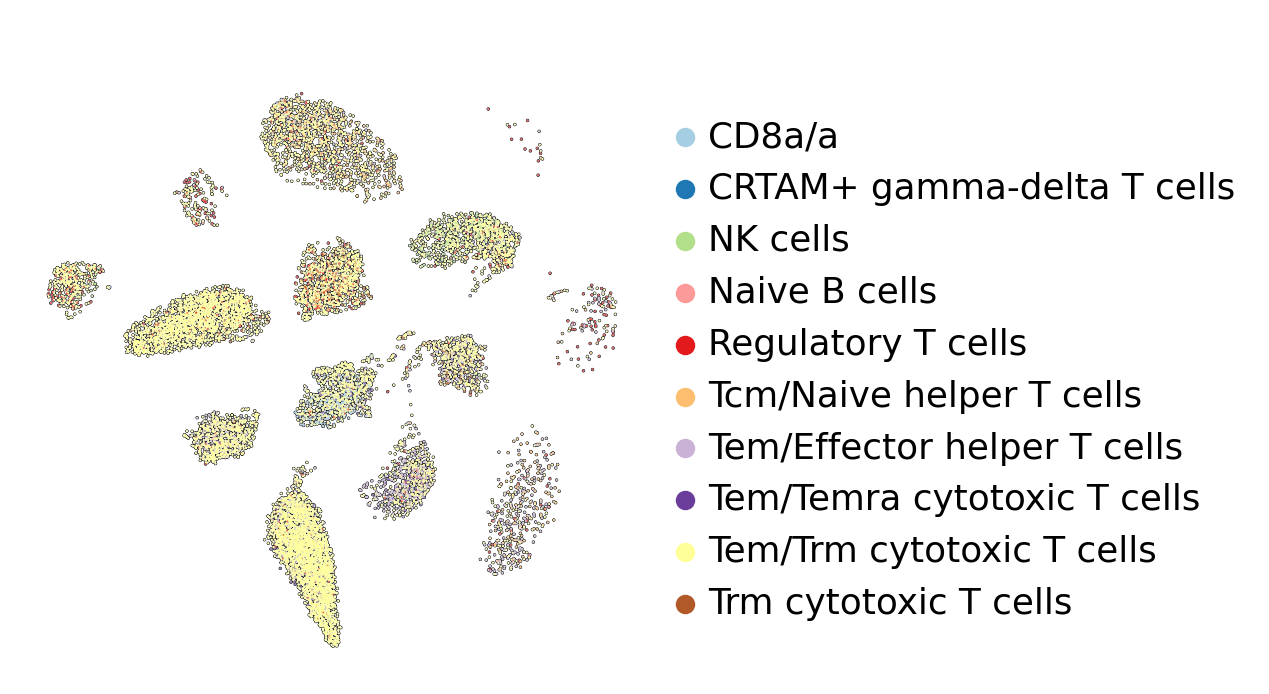

In [37]:
sc.pl.umap(adata[adata.obs['predicted_labels'].isin(['CD8a/a',
                                          'Tem/Trm cytotoxic T cells',
                                          'Tem/Temra cytotoxic T cells',
                                          'Trm cytotoxic T cells','Tcm/Naive cytotoxic T cells',
                                          'T(agonist)','CD8a/b(entry)'
                                         ])], color='majority_voting', add_outline=True,
           legend_fontoutline=1,frameon=False,
               title='  ', palette='Paired',s=2)

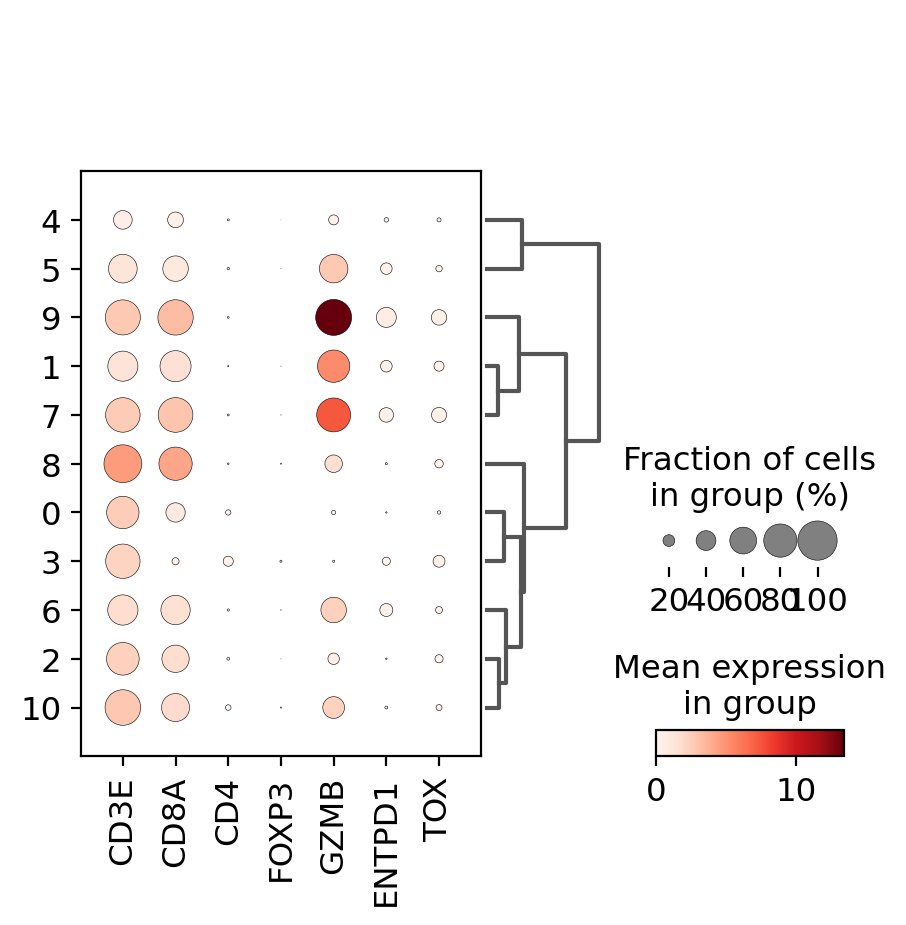

In [38]:
sc.pl.dotplot(adata[adata.obs['predicted_labels'].isin(['CD8a/a',
                                          'Tem/Trm cytotoxic T cells',
                                          'Tem/Temra cytotoxic T cells',
                                          'Trm cytotoxic T cells','Tcm/Naive cytotoxic T cells',
                                          'T(agonist)','CD8a/b(entry)'
                                         ])],
              ['CD3E','CD8A',"CD4","FOXP3","GZMB","ENTPD1","TOX"], groupby='desc_0.4', dendrogram=True)

In [39]:
adataCD8 = adata[adata.obs['predicted_labels'].isin(['CD8a/a',
                                          'Tem/Trm cytotoxic T cells',
                                          'Tem/Temra cytotoxic T cells',
                                          'Trm cytotoxic T cells','Tcm/Naive cytotoxic T cells',
                                          'T(agonist)','CD8a/b(entry)'
                                         ])]

In [42]:
adataCD8.X = adataCD8.layers['counts']

In [43]:
adataCD8.write("/home/lugli/spuccio/Projects/SP025_NaClTcell/Analysis/CD8_raw.h5ad")